multilayer percepton used



In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import argmax


In [ ]:
x,y=load_digits().data,load_digits().target

In [ ]:
x.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

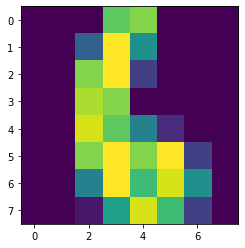

In [ ]:
plt.imshow(x[6].reshape(8,8))

In [ ]:
def softmax(a):
  e_a=np.exp(a)
  ans=e_a/np.sum(e_a,axis=1,keepdims=True)
  return ans 

keepdims for keping the same dimension (without changing)


In [ ]:
softmax([[90,10],[70,30]]) 

array([[1.00000000e+00, 1.80485139e-35],
       [1.00000000e+00, 4.24835426e-18]])

In [ ]:
class NN:
  def __init__(self,input_size=64,layers=[500,1000],output=10):
    np.random.seed(0)
    model={}
    model['w1']=np.random.randn(input_size,layers[0])
    model['b1']=np.zeros((1,layers[0]))

    model['w2']=np.random.randn(layers[0],layers[1])
    model['b2']=np.zeros((1,layers[1]))
    
    model['w3']=np.random.randn(layers[1],output)
    model['b3']=np.zeros((1,output))
    
    self.model=model
  def forward(self,x):
      z1=np.dot(x,self.model['w1'])+self.model['b1']
      a1=np.tanh(z1)

      z2=np.dot(a1,self.model['w2'])+self.model['b2']
      a2=np.tanh(z2)

      z3=np.dot(a2,self.model['w3'])+self.model['b3']
      y_=softmax(z3)

      self.activation_outputs=(a1,a2,y_)
      return y_
  def backward(self,x,y,learning_rate=0.01):
      w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
      b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
      m=x.shape[0]
      a1,a2,y_=self.activation_outputs

      delta3=y_-y
      dw3=np.dot(a2.T,delta3)
      db3=np.sum(delta3,axis=0)/float(m)

      delta2=(1-np.square((a2))*np.dot(delta3,w3.T))
      dw2=np.dot(a1.T,delta2)
      db2=np.sum(delta2,axis=0)/float(m)

      delta1=(1-np.square((a1))*np.dot(delta2,w2.T))
      dw1=np.dot(x.T,delta1)
      db1=np.sum(delta1,axis=0)/float(m)

      self.model['w1']-=learning_rate*dw1/m
      self.model['b1']-=learning_rate*db1

      self.model['w2']-=learning_rate*dw2/m
      self.model['b2']-=learning_rate*db2

      self.model['w3']-=learning_rate*dw3/m
      self.model['b3']-=learning_rate*db3

  
  def prdict(self,x):
    y_out=self.forward(x)
    return np,argmax(y_out,axis=1)

  def loss(y_oht,y_):
    l=-np.mean(y_oht*np.log(y_))
    return 1

  def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

  def train(x,y,model,epochs,learning_rate=0.01,logs=True):
    training_loss=[]
    classes=10
    y_oht= one_hot(y,classes)
    for ix in range(epochs):
      y_=model.forward(x)
      l=loss(y_oht,y_)
      model.backward(x,y_oht,learning_rate)
      training_loss.append(l)
      if(logs):
        print("Epoch %d Loss %.4f"%(ix,l))
    return training_loss

    

In [ ]:
model=NN()
loss=train(x,y,model,700)

Epoch 0 Loss 1.0000
Epoch 1 Loss 1.0000
Epoch 2 Loss 1.0000
Epoch 3 Loss 1.0000
Epoch 4 Loss 1.0000
Epoch 5 Loss 1.0000
Epoch 6 Loss 1.0000
Epoch 7 Loss 1.0000
Epoch 8 Loss 1.0000
Epoch 9 Loss 1.0000
Epoch 10 Loss 1.0000
Epoch 11 Loss 1.0000
Epoch 12 Loss 1.0000
Epoch 13 Loss 1.0000
Epoch 14 Loss 1.0000
Epoch 15 Loss 1.0000
Epoch 16 Loss 1.0000
Epoch 17 Loss 1.0000
Epoch 18 Loss 1.0000
Epoch 19 Loss 1.0000
Epoch 20 Loss 1.0000
Epoch 21 Loss 1.0000
Epoch 22 Loss 1.0000
Epoch 23 Loss 1.0000
Epoch 24 Loss 1.0000
Epoch 25 Loss 1.0000
Epoch 26 Loss 1.0000
Epoch 27 Loss 1.0000
Epoch 28 Loss 1.0000
Epoch 29 Loss 1.0000
Epoch 30 Loss 1.0000
Epoch 31 Loss 1.0000
Epoch 32 Loss 1.0000
Epoch 33 Loss 1.0000
Epoch 34 Loss 1.0000
Epoch 35 Loss 1.0000
Epoch 36 Loss 1.0000
Epoch 37 Loss 1.0000
Epoch 38 Loss 1.0000
Epoch 39 Loss 1.0000
Epoch 40 Loss 1.0000
Epoch 41 Loss 1.0000
Epoch 42 Loss 1.0000
Epoch 43 Loss 1.0000
Epoch 44 Loss 1.0000
Epoch 45 Loss 1.0000
Epoch 46 Loss 1.0000
Epoch 47 Loss 1.0000
Ep

In [ ]:
ypred=model.predict(x)

In [ ]:
np.mean(ypred==y)

In [ ]:
ypre[20]


In [ ]:
y[20]